In [1]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Statistics
using JSON
using StatsPlots

In [2]:
paths = Dict(
    "discrete" =>"exp_darwin_discrete_2025-05-27_20-21-52",
    "fuzzy" =>"exp_darwin_fuzzy_2025-05-29_15-22-47",
    "plus" =>"exp_darwin_plus_2025-05-27_19-49-52",
    "goal" =>"exp_darwin_goal_2025-05-27_20-23-34",
    "hybrid" =>"exp_darwin_hybrid_2025-05-27_21-15-09",
)
trials = Dict(
    "discrete" => 50,
    "fuzzy" => 2,
    "plus" => 50,
    "goal" => 15,
    "hybrid" => 10
)

Dict{String, Int64} with 5 entries:
  "plus"     => 50
  "hybrid"   => 10
  "fuzzy"    => 2
  "goal"     => 15
  "discrete" => 50

In [3]:
function read_data(model)
    path = "exps/" * paths[model]
    iter = trials[model]
    acc = zeros(iter)
    complete_time = zeros(iter)
    init_time = zeros(iter)
    sstep = zeros(iter)
    gammastep = zeros(iter)
    wstep = zeros(iter)
    rstep = zeros(iter)
    lambdastep = zeros(iter)
    no_empty_cluster = zeros(iter)
    loss = zeros(iter)
    for i in 1:iter
        json_data = JSON.parsefile("$(path)/params_$i.json")
        acc[i] = json_data["accuracy"]
        complete_time[i] = json_data["complete_time"]
        init_time[i] = json_data["complete_time"] - json_data["opt_time"]
        if model == "discrete" || model == "plus"
            df = CSV.read("$(path)/opt_times_$i.csv",DataFrame)
            sstep[i] = sum(df[:,"sstep"])/1e9
            gammastep[i] = sum(df[:,"gammastep"])/1e9
            wstep[i] = sum(df[:,"wstep"])/1e9
            lambdastep[i] = sum(df[:,"lambdastep"])/1e9
            no_empty_cluster[i] = sum(df[:,"no_empty_cluster"])/1e9
            loss[i] = sum(df[:,"loss"])/1e9
        end
        if model == "fuzzy"
            df = CSV.read("$(path)/opt_times_$i.csv",DataFrame)
            sstep[i] = sum(df[:,"sstep"])/1e9
            gammastep[i] = sum(df[:,"gammastep"])/1e9
            wstep[i] = sum(df[:,"wstep"])/1e9
            lambdastep[i] = sum(df[:,"lambdastep"])/1e9
            loss[i] = sum(df[:,"loss"])/1e9
        end
        if model == "goal"
            df = CSV.read("$(path)/opt_times_$i.csv",DataFrame)
            sstep[i] = sum(df[:,"sstep"])/1e9
            gammastep[i] = sum(df[:,"gammastep"])/1e9
            rstep[i] = sum(df[:,"rstep"])/1e9
            lambdastep[i] = sum(df[:,"lambdastep"])/1e9
            no_empty_cluster[i] = sum(df[:,"no_empty_cluster"])/1e9
            loss[i] = sum(df[:,"loss"])/1e9
        end
    end

    return acc, complete_time, init_time, sstep, gammastep, wstep, lambdastep, no_empty_cluster, loss

end

read_data (generic function with 1 method)

In [6]:
discr_accs, discr_times = read_data("discrete")
plus_accs, plus_times = read_data("plus")
goal_accs, goal_times = read_data("goal")
hybrid_accs, hybrid_times = read_data("hybrid")
fuzzy_accs, fuzzy_times = read_data("fuzzy")

([0.4857142857142857, 0.4857142857142857], [13570.470571299, 14047.230261414], [0.4129097509994608, 0.0001121400000556605], [938.405484772, 17.551505058], [1712.815024503, 7966.511387449], [10834.105848267, 5161.895137922], [75.974319067, 892.927082766], [0.0, 0.0], [8.464476242, 8.241155101])

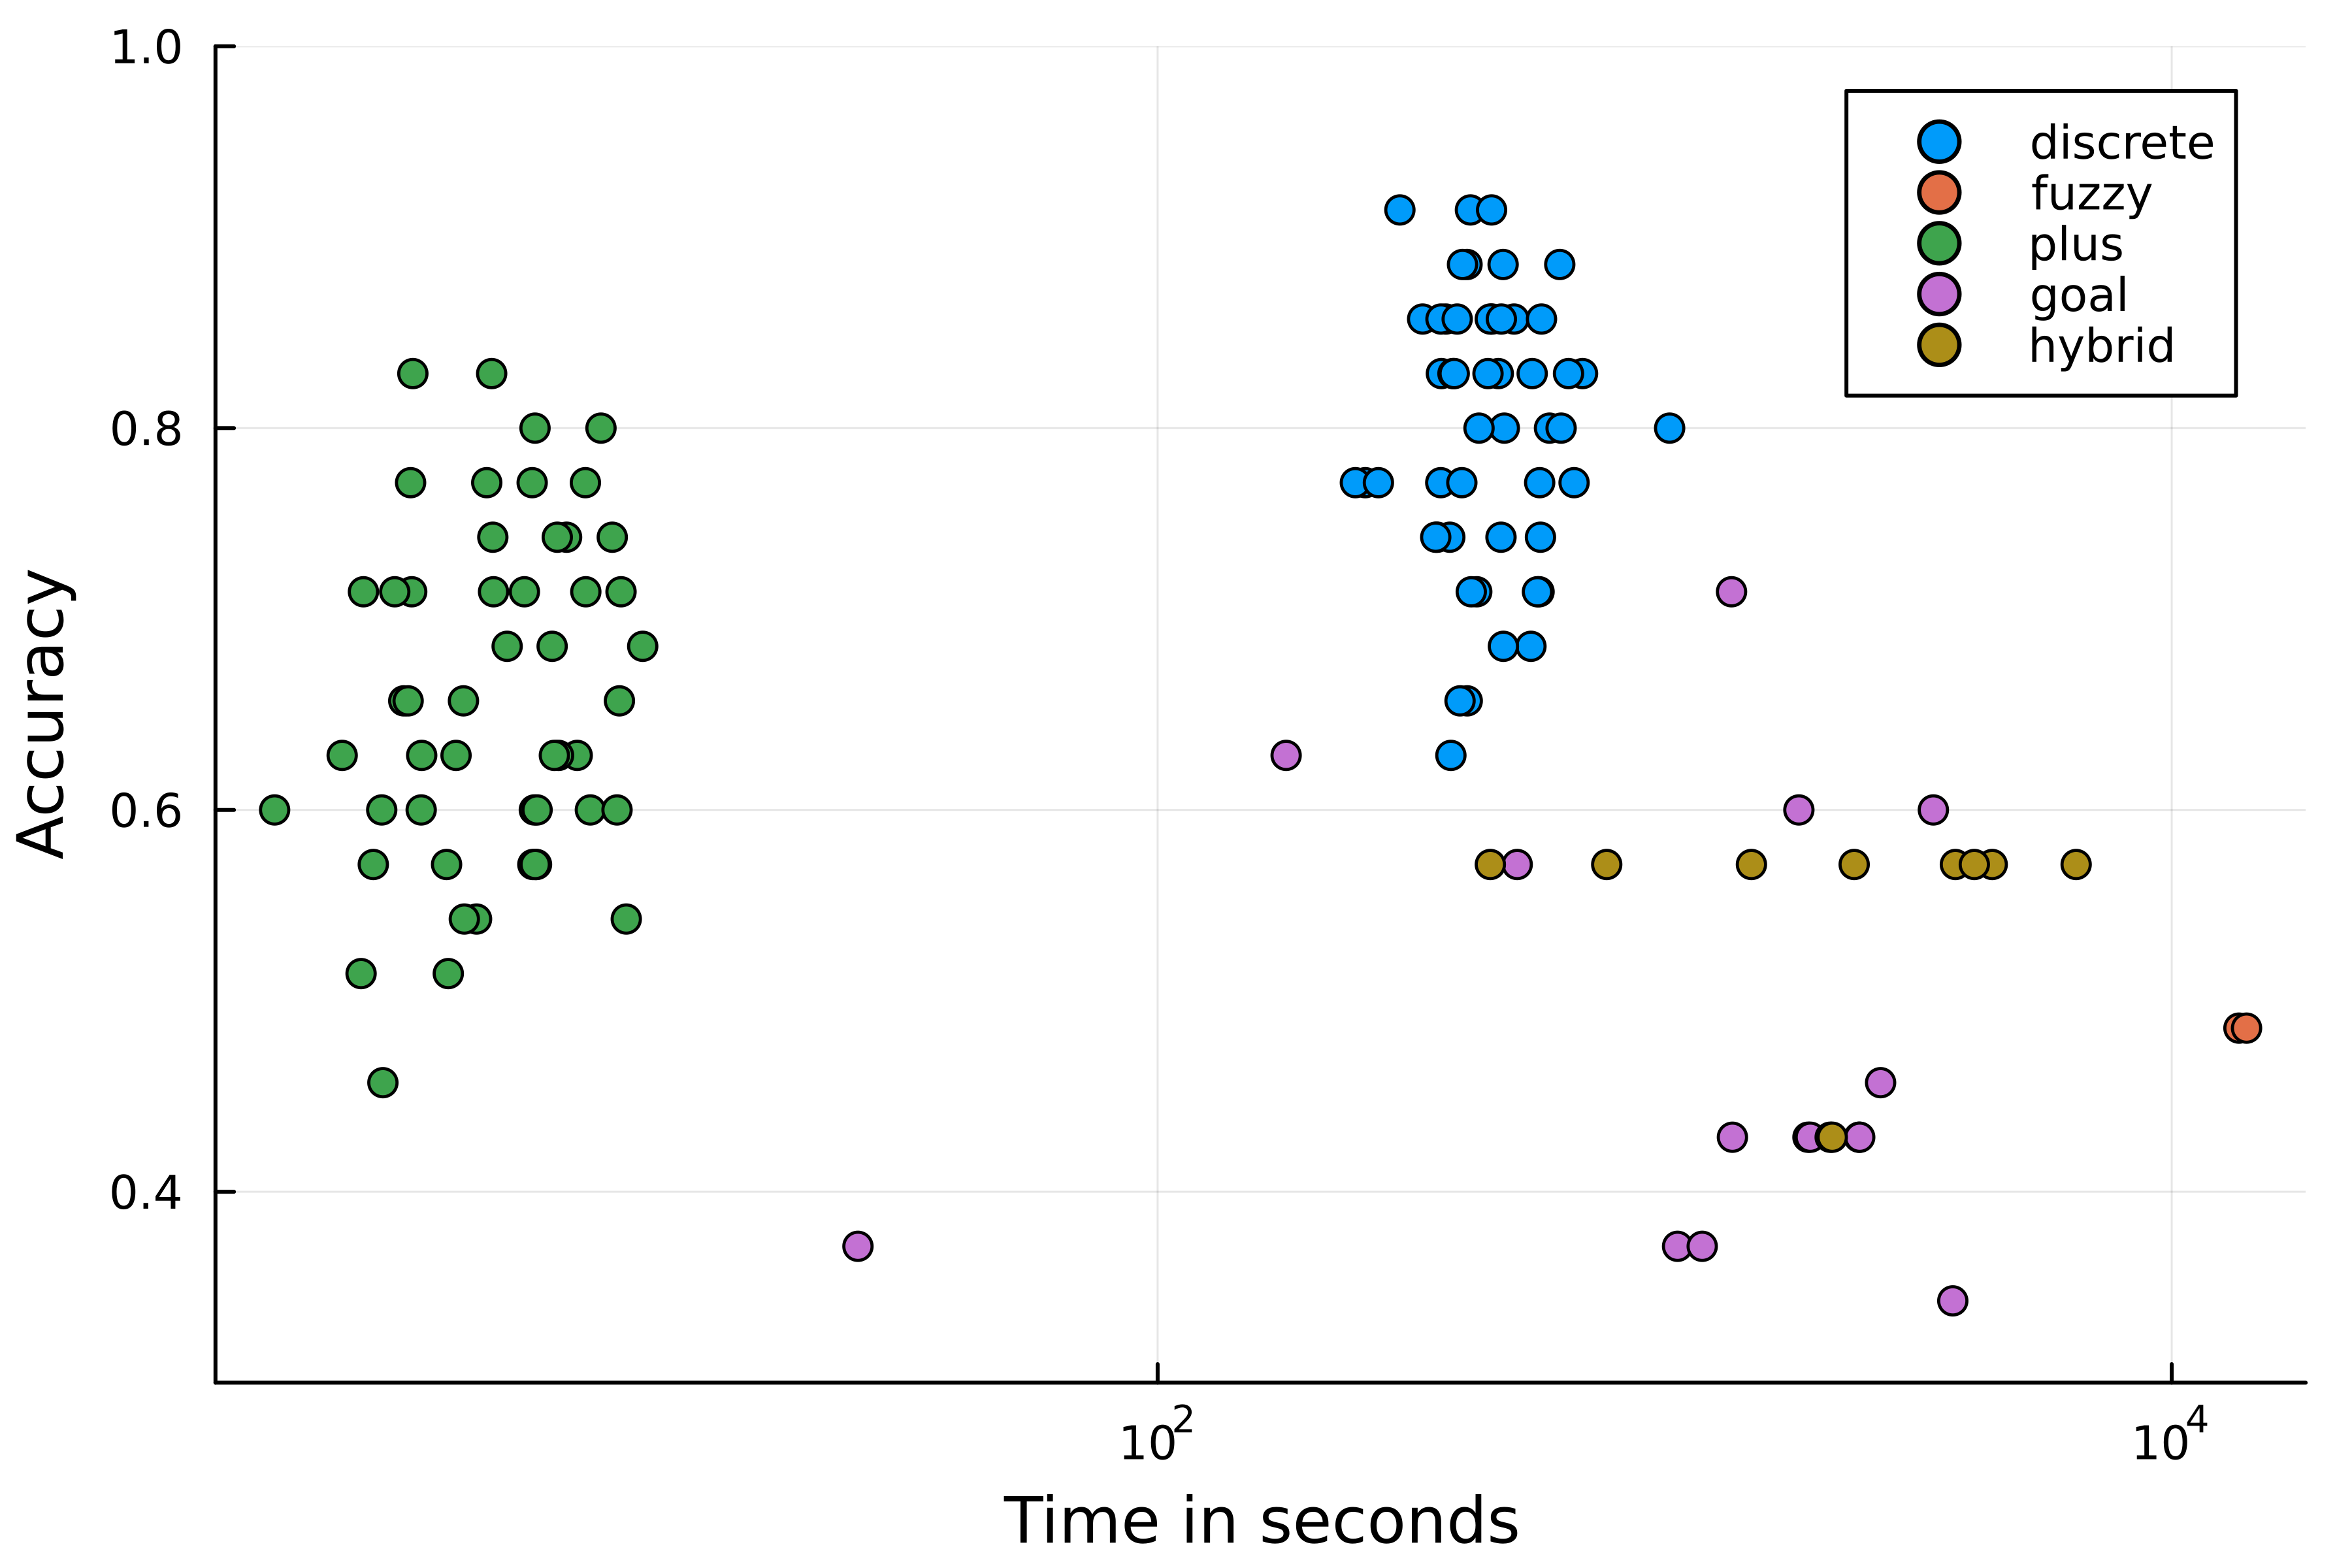

In [7]:
p = scatter(discr_times, discr_accs, label = "discrete",xlabel="Time in seconds",ylabel="Accuracy",ylim=(0.3,1.0),xaxis = :log,dpi=600)
scatter!(fuzzy_times, fuzzy_accs, label="fuzzy")
scatter!(plus_times, plus_accs, label = "plus")
scatter!(goal_times, goal_accs, label = "goal")
scatter!(hybrid_times, hybrid_accs, label="hybrid")
savefig(p,"plots/darwin_acc_time.png")
p

In [8]:
mean(discr_accs), std(discr_accs)

(0.7982857142857144, 0.07172765373181313)

In [9]:
maximum(discr_accs)

0.9142857142857143

In [10]:
maximum(plus_accs)

0.8285714285714286

In [11]:
mean(plus_accs), std(plus_accs)

(0.6588571428571427, 0.08931410627298436)

In [14]:
function percentages(model)
    if model == "discrete" || model == "plus"
        acc, complete_time, init_time, sstep, gammastep, wstep, lambdastep, no_empty_cluster, loss = read_data(model)
        init_perc = init_time ./ complete_time
        sstep_perc = sstep ./ complete_time
        gammastep_perc = gammastep ./ complete_time
        wstep_perc = wstep ./ complete_time
        rstep_perc = 0.
        lambdastep_perc = lambdastep ./ complete_time
        noc_perc = no_empty_cluster ./ complete_time
        loss_perc = loss ./ complete_time
        return mean(init_perc), mean(sstep_perc), mean(gammastep_perc), mean(wstep_perc), mean(rstep_perc) ,mean(lambdastep_perc), mean(noc_perc), mean(loss_perc)
    end
    if model == "goal"
        acc, complete_time, init_time, sstep, gammastep, rstep, lambdastep, no_empty_cluster, loss = read_data(model)
        init_perc = init_time ./ complete_time
        sstep_perc = sstep ./ complete_time
        gammastep_perc = gammastep ./ complete_time
        rstep_perc = rstep ./ complete_time
        wstep_perc = 0
        lambdastep_perc = lambdastep ./ complete_time
        noc_perc = no_empty_cluster ./ complete_time
        loss_perc = loss ./ complete_time
        return mean(init_perc), mean(sstep_perc), mean(gammastep_perc), mean(wstep_perc), mean(rstep_perc) ,mean(lambdastep_perc), mean(noc_perc), mean(loss_perc)
    end
    if model == "fuzzy"
        acc, complete_time, init_time, sstep, gammastep, wstep, lambdastep, no_empty_cluster, loss = read_data(model)
        init_perc = init_time ./ complete_time
        sstep_perc = sstep ./ complete_time
        gammastep_perc = gammastep ./ complete_time
        wstep_perc = wstep ./ complete_time
        rstep_perc = 0.
        lambdastep_perc = lambdastep ./ complete_time
        noc_perc = 0.
        loss_perc = loss ./ complete_time
        return mean(init_perc), mean(sstep_perc), mean(gammastep_perc), mean(wstep_perc), mean(rstep_perc) ,mean(lambdastep_perc), mean(noc_perc), mean(loss_perc)
    end
end

percentages (generic function with 1 method)

In [15]:
percs = [collect(percentages("discrete")), collect(percentages("plus")), collect(percentages("fuzzy")),collect(percentages("goal"))]
matrix_percs = hcat(percs...)
matrix_percs = matrix_percs .* 100

8×4 Matrix{Float64}:
  0.00158622   0.116083   0.00152175   0.0178045
  0.197345    13.8533     3.52         1.88996
  0.11138     14.451     34.667       93.1142
 99.5018      63.9034    58.2913       0.0
  0.0          0.0        0.0          0.0
  0.00596626   0.182193   3.45823      0.00148385
  0.0029369    0.116394   0.0          0.00205542
  0.176852     7.26702    0.0605209    0.185154

In [101]:
sum(matrix_percs[:,3])

0.9997818754647746

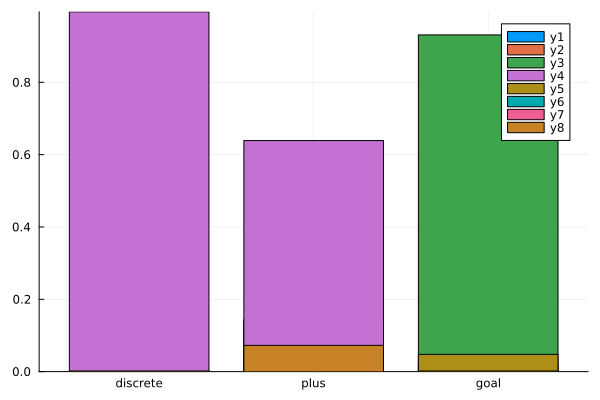

In [97]:
bar(matrix_percs',stacked=true,xticks = (1:3,["discrete","plus","goal"]))

In [40]:
acc, complete_time, init_time, sstep, gammastep, wstep, lambdastep, no_empty_cluster, loss = read_data("plus")

([0.6857142857142857, 0.5428571428571428, 0.8, 0.6, 0.6285714285714286, 0.5714285714285714, 0.6571428571428571, 0.6285714285714286, 0.7714285714285715, 0.6285714285714286  …  0.7142857142857143, 0.6571428571428571, 0.6571428571428571, 0.7428571428571429, 0.6857142857142857, 0.6, 0.6, 0.6571428571428571, 0.5714285714285714, 0.5714285714285714], [9.647849917, 8.953836737, 5.916121547, 7.606611786, 7.165945534, 3.95913403, 3.259525532, 2.464360163, 4.751636588, 6.584481524  …  5.637762896, 3.325010136, 4.274655181, 6.545467243, 6.395034371, 8.585778455, 5.972202409, 8.679896715, 2.838385557, 5.921176298], [0.514023056000001, 0.0001286999999994265, 0.00013051800000063452, 0.00010923399999995809, 0.00016326099999997012, 0.00024988199999986804, 0.00020826499999992976, 0.00012438299999972813, 0.00018299400000021393, 0.00017782499999974277  …  0.0006427589999997707, 0.000148444999999775, 0.00014242499999994607, 0.00023482799999996473, 0.0004678570000002935, 0.00011353799999902492, 0.0001628930

In [41]:
init_perc = init_time ./ complete_time
sstep_perc = sstep ./ complete_time
gammastep_perc = gammastep ./ complete_time
wstep_perc = wstep ./ complete_time
lambdastep_perc = lambdastep ./ complete_time
noc_perc = no_empty_cluster ./ complete_time
loss_perc = loss ./ complete_time


50-element Vector{Float64}:
 0.08117411068139027
 0.10232751901918
 0.014911239111497583
 0.09109610487488602
 0.07562398310575828
 0.0629446611586423
 0.05620792725853697
 0.10483122308125058
 0.09561100950929878
 0.06065349527435321
 ⋮
 0.07932256300345907
 0.04277323368974682
 0.05940737193602972
 0.0742215433825383
 0.08888241270138854
 0.06423348787072229
 0.040364830884972114
 0.03427877187440184
 0.08919634755316992

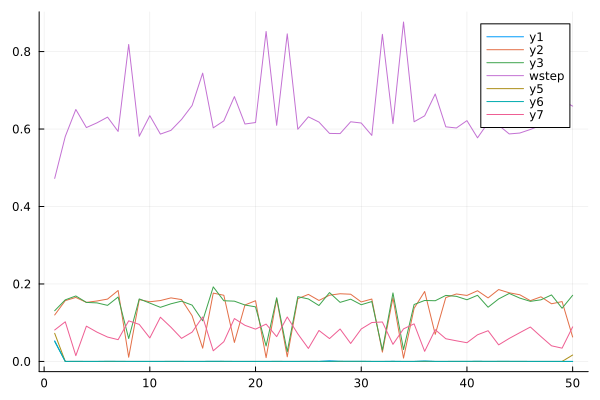

In [42]:
plot(init_perc)
plot!(sstep_perc)
plot!(gammastep_perc)
plot!(wstep_perc, label = "wstep")
plot!(lambdastep_perc)
plot!(noc_perc)
plot!(loss_perc)

In [43]:
mean(wstep_perc)

0.6390335467189153

In [44]:
mean(init_perc) + mean(sstep_perc) + mean(gammastep_perc) + mean(wstep_perc) + mean(lambdastep_perc) + mean(noc_perc) + mean(loss_perc)

0.998893102371808

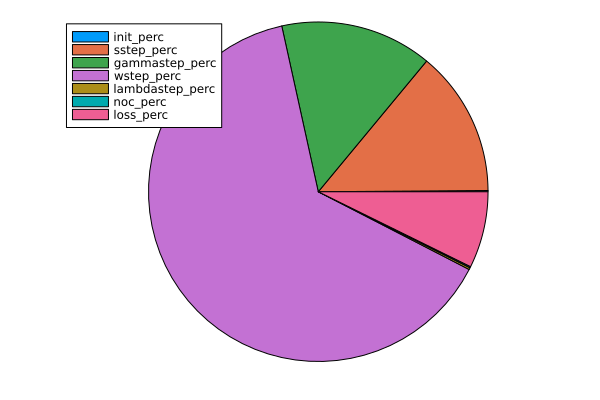

In [ ]:
pie(["init_perc","sstep_perc","gammastep_perc","wstep_perc","lambdastep_perc","noc_perc","loss_perc"],[mean(init_perc) , mean(sstep_perc) , mean(gammastep_perc) , mean(wstep_perc) , mean(lambdastep_perc) , mean(noc_perc) , mean(loss_perc)])

In [50]:
acc, complete_time, init_time, sstep, gammastep, rstep, lambdastep, no_empty_cluster, loss = read_data("goal")
init_perc = init_time ./ complete_time
sstep_perc = sstep ./ complete_time
gammastep_perc = gammastep ./ complete_time
rstep_perc = rstep ./ complete_time
lambdastep_perc = lambdastep ./ complete_time
noc_perc = no_empty_cluster ./ complete_time
loss_perc = loss ./ complete_time

15-element Vector{Float64}:
 0.00043746307374931397
 0.0005580411237761365
 0.0003692386430293222
 0.0005851702304795869
 0.0008476732559060863
 0.0002047363572224213
 0.000279514779416449
 0.00379158092657555
 0.0006651278784783533
 0.0006251607389927062
 0.0005493381096206787
 0.00041670642103340446
 0.0003720106604672606
 0.0017393777267546225
 0.01633198305746125

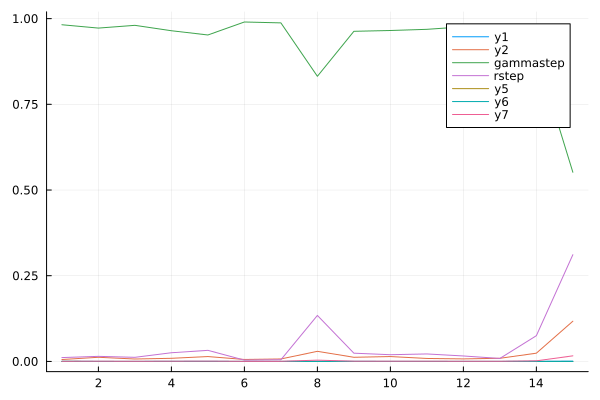

In [52]:
plot(init_perc)
plot!(sstep_perc)
plot!(gammastep_perc,label="gammastep")
plot!(rstep_perc, label = "rstep")
plot!(lambdastep_perc)
plot!(noc_perc)
plot!(loss_perc)

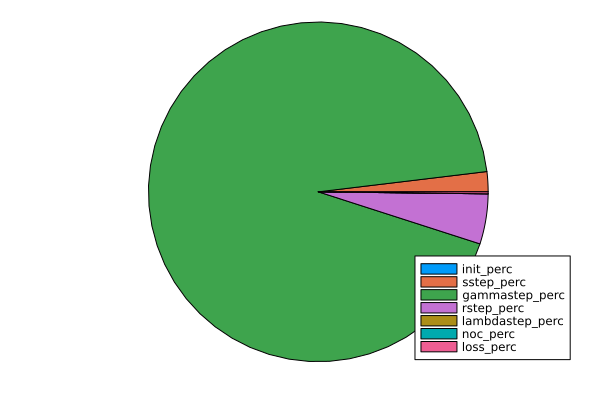

In [53]:
pie(["init_perc","sstep_perc","gammastep_perc","rstep_perc","lambdastep_perc","noc_perc","loss_perc"],[mean(init_perc) , mean(sstep_perc) , mean(gammastep_perc) , mean(rstep_perc) , mean(lambdastep_perc) , mean(noc_perc) , mean(loss_perc)])


In [114]:
path = "exps/" * "exp_darwin_hybrid_2025-05-27_21-15-09"
iter =10
complete_time = zeros(iter)
init_time = zeros(iter)
discr_phase = zeros(iter)
fuzzy_phase = zeros(iter)
for i in 1:iter
    json_data = JSON.parsefile("$(path)/params_$i.json")
    complete_time[i] = json_data["complete_time"]
    init_time[i] = json_data["complete_time"] - json_data["opt_time"]
    df_discr = CSV.read("$(path)/opt_times_discr_$i.csv",DataFrame)
    discr_phase[i] = sum(sum(col) for col in eachcol(df_discr))/1e9
    df_fuzzy = CSV.read("$(path)/opt_times_fuzzy_$i.csv",DataFrame)
    fuzzy_phase[i] = sum(sum(col) for col in eachcol(df_fuzzy))/1e9
end

In [115]:
init_time

10-element Vector{Float64}:
 0.5183950750001713
 0.00015970000004017493
 0.00025050099975487683
 0.00012550900009955512
 0.0002727370001593954
 0.00013859799992133048
 0.00010919199985437444
 0.00012499300004265024
 0.000262840999994296
 0.00035646500009534066

In [116]:
complete_time

10-element Vector{Float64}:
 2364.587581863
 2120.455163314
 6479.364784449
 3744.369402405
 4426.058205593
 4080.231111604
 1482.845358201
  453.072547927
  768.59549752
 2140.381256821

In [117]:
discr_phase

10-element Vector{Float64}:
 10.038772764
  8.665287328
  5.413750556
  3.609210253
  1.884073969
  4.570278198
  4.84382858
  4.803385499
  4.738202714
  3.307164456

In [118]:
fuzzy_phase

10-element Vector{Float64}:
 2353.822610018
 2111.758705555
 6473.931910918
 3740.742492321
 4424.156753443
 4075.637664154
 1477.973275423
  448.259677655
  763.837847924
 2137.07116345

In [121]:
mean(init_time ./ complete_time * 100)

0.0022033388309739806

In [122]:
mean(discr_phase ./ complete_time * 100)

0.3325547040030152

In [123]:
discr_phase ./ complete_time * 100

10-element Vector{Float64}:
 0.42454645541573466
 0.40865223080016766
 0.08355372380010831
 0.09639033613194821
 0.04256776304069352
 0.11201027767771111
 0.3266577025858295
 1.0601802119721302
 0.6164754710753044
 0.15451286753052415

In [124]:
mean(fuzzy_phase ./ complete_time * 100)

99.66338773447207